In [16]:
import pandas as pd

# Upload the dataset manually
from google.colab import files
uploaded = files.upload()

# Load it into a dataframe
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
df.drop(["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], axis=1, inplace=True)


In [18]:
df["Attrition"] = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)


In [19]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [20]:
from sklearn.model_selection import train_test_split

X = df.drop("Attrition", axis=1)
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7993197278911565
Confusion Matrix:
 [[226  29]
 [ 30   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       255
           1       0.24      0.23      0.23        39

    accuracy                           0.80       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.80      0.80      0.80       294



<Figure size 640x480 with 0 Axes>

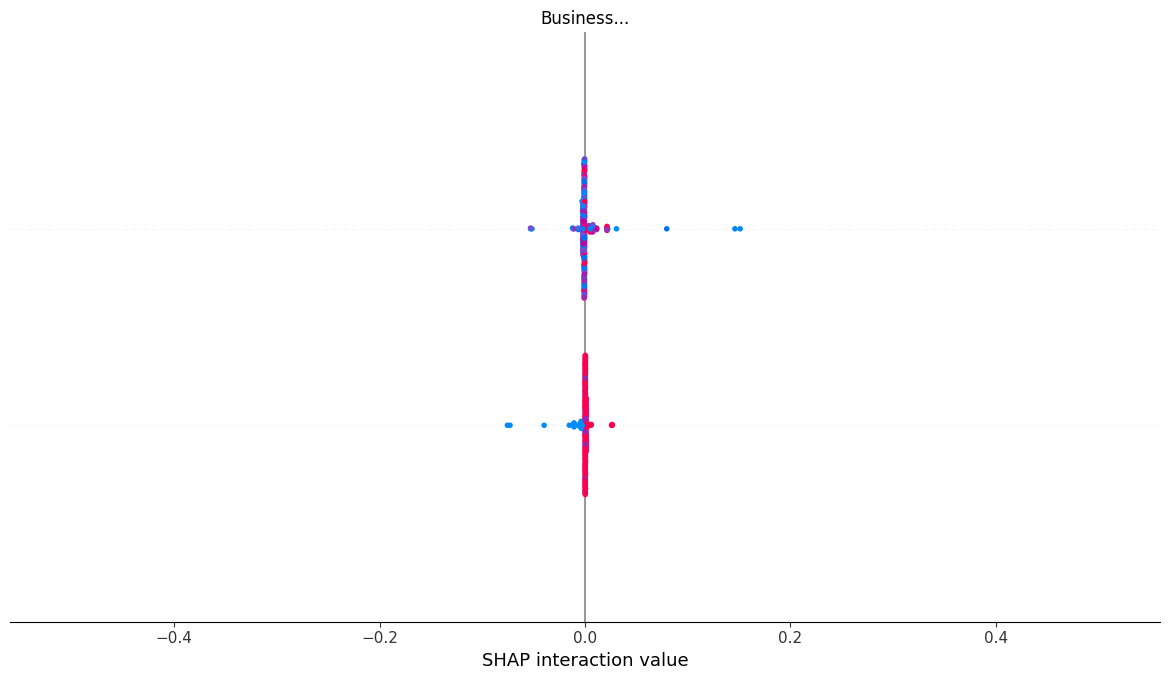

In [23]:
!pip install shap

import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot (shows top influencing features)
shap.summary_plot(shap_values, X_test)


In [24]:
with open("model_report.txt", "w") as f:
    f.write("Accuracy: " + str(accuracy_score(y_test, y_pred)) + "\n")
    f.write("Confusion Matrix:\n" + str(confusion_matrix(y_test, y_pred)) + "\n")
    f.write("Classification Report:\n" + classification_report(y_test, y_pred))

files.download("model_report.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

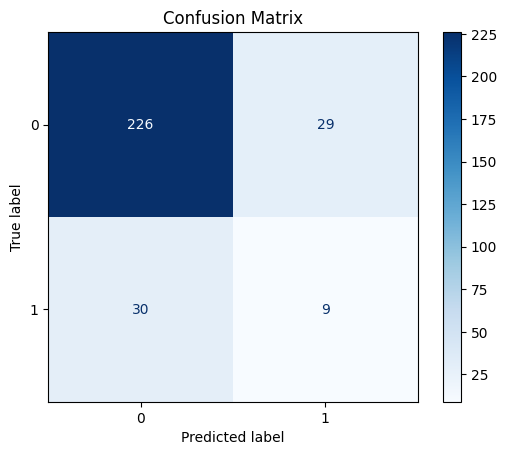

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have true labels y_test and predictions y_pred
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot and save
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")  # Saves image in Colab environment
plt.show()


In [27]:
from google.colab import files
files.download("confusion_matrix.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
pdf.output("Attrition_Prevention_Suggestions.pdf")


''

In [29]:
from google.colab import files
files.download("Attrition_Prevention_Suggestions.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>